# Countries energy insight 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Load all CSVs từ 2019 đến 2025
all_files = sorted(glob.glob("/kaggle/input/energy-dataset/*.xlsx"))
df_list = [pd.read_excel(file) for file in all_files]
pre_df = pd.concat(df_list, ignore_index=True)


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
pre_df

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate,UpdateDate
0,Monthly Hourly Load Values,2019-01-01 00:00:00,2019-01-01,1970-01-01 00:00:00,1970-01-01 01:00:00,AT,100,5852.50,5852.50,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
1,Monthly Hourly Load Values,2019-01-01 01:00:00,2019-01-01,1970-01-01 01:00:00,1970-01-01 02:00:00,AT,100,5619.20,5619.20,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
2,Monthly Hourly Load Values,2019-01-01 02:00:00,2019-01-01,1970-01-01 02:00:00,1970-01-01 03:00:00,AT,100,5323.90,5323.90,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
3,Monthly Hourly Load Values,2019-01-01 03:00:00,2019-01-01,1970-01-01 03:00:00,1970-01-01 04:00:00,AT,100,5273.30,5273.30,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
4,Monthly Hourly Load Values,2019-01-01 04:00:00,2019-01-01,1970-01-01 04:00:00,1970-01-01 05:00:00,AT,100,5439.00,5439.00,2024-05-29 11:37:27.260,2024-05-29 11:37:27.260
...,...,...,...,...,...,...,...,...,...,...,...
1909419,Monthly Hourly Load Values,2025-03-31 19:00:00,2025-03-31,1970-01-01 19:00:00,1970-01-01 20:00:00,XK,100,863.25,863.25,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909420,Monthly Hourly Load Values,2025-03-31 20:00:00,2025-03-31,1970-01-01 20:00:00,1970-01-01 21:00:00,XK,100,876.63,876.63,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909421,Monthly Hourly Load Values,2025-03-31 21:00:00,2025-03-31,1970-01-01 21:00:00,1970-01-01 22:00:00,XK,100,879.89,879.89,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480
1909422,Monthly Hourly Load Values,2025-03-31 22:00:00,2025-03-31,1970-01-01 22:00:00,1970-01-01 23:00:00,XK,100,796.14,796.14,2025-06-04 09:35:31.480,2025-06-04 09:35:31.480


In [3]:
# Chọn cột cần thiết
pre_df = pre_df[['CountryCode', 'DateUTC', 'Value']]

# Tính range (max - min) theo từng quốc gia
country_stats = (
    pre_df.groupby('CountryCode')['Value']
    .agg(['min', 'max'])
    .assign(range=lambda x: x['max'] - x['min'])
    .sort_values(by='range', ascending=False)
)

In [4]:

# Chọn 3 quốc gia: dao động cao, trung bình, thấp
top_range = country_stats.iloc[0].name
mid_range = country_stats.iloc[len(country_stats)//2].name
low_range = country_stats.iloc[-1].name

selected_countries = [top_range, mid_range, low_range, 'AT']
print("Selected countries:", selected_countries)

Selected countries: ['FR', 'AT', 'LU', 'AT']


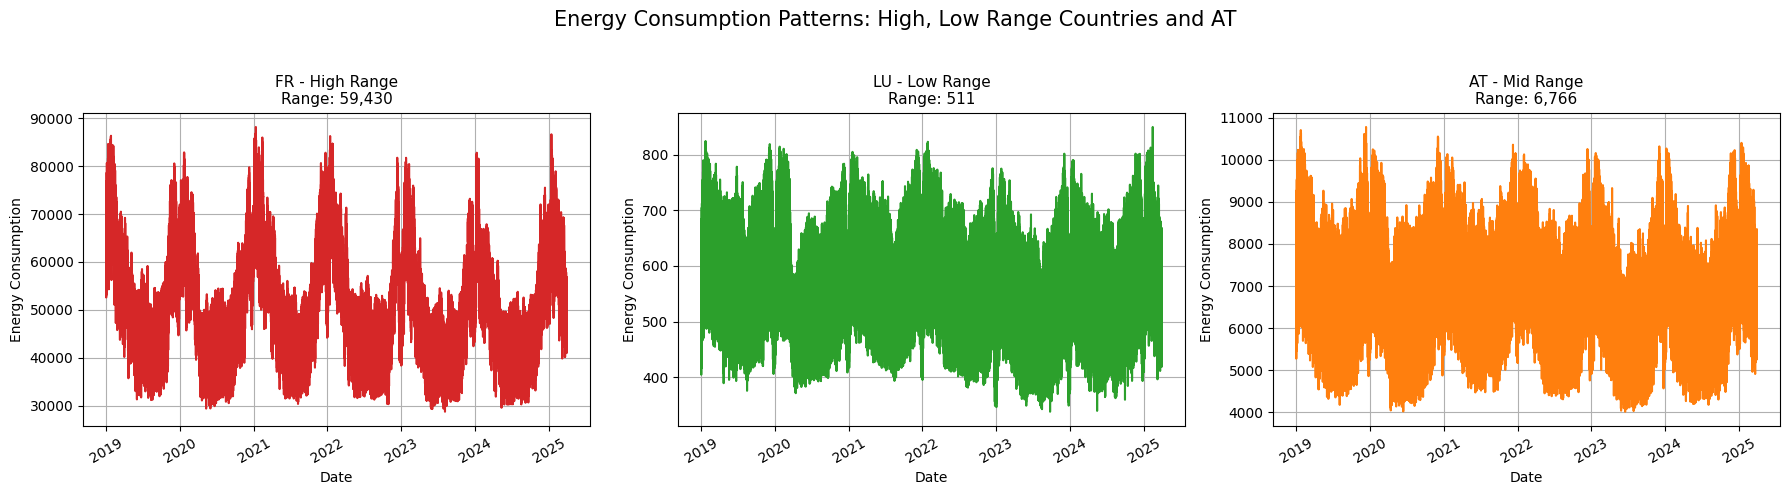

In [23]:
import matplotlib.pyplot as plt

# Ánh xạ label và màu
label_map = {
    top_range: "High Range",
    low_range: "Low Range",
    'AT': "Mid Range"
}

color_map = {
    top_range: 'tab:red',
    low_range: 'tab:green',
    'AT': 'tab:orange'
}

selected_countries = [top_range, low_range, 'AT']

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=False)

for i, country in enumerate(selected_countries):
    subset = pre_df[pre_df['CountryCode'] == country]
    subset = subset.groupby('DateUTC')['Value'].mean().reset_index()
    range_val = subset['Value'].max() - subset['Value'].min()

    axs[i].plot(subset['DateUTC'], subset['Value'],
                color=color_map[country], linewidth=1.5)
    
    axs[i].set_title(f"{country} - {label_map[country]}\nRange: {range_val:,.0f}", fontsize=11)
    axs[i].tick_params(axis='x', rotation=30)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Energy Consumption")
    axs[i].grid(True)

fig.suptitle("Energy Consumption Patterns: High, Low Range Countries and AT", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


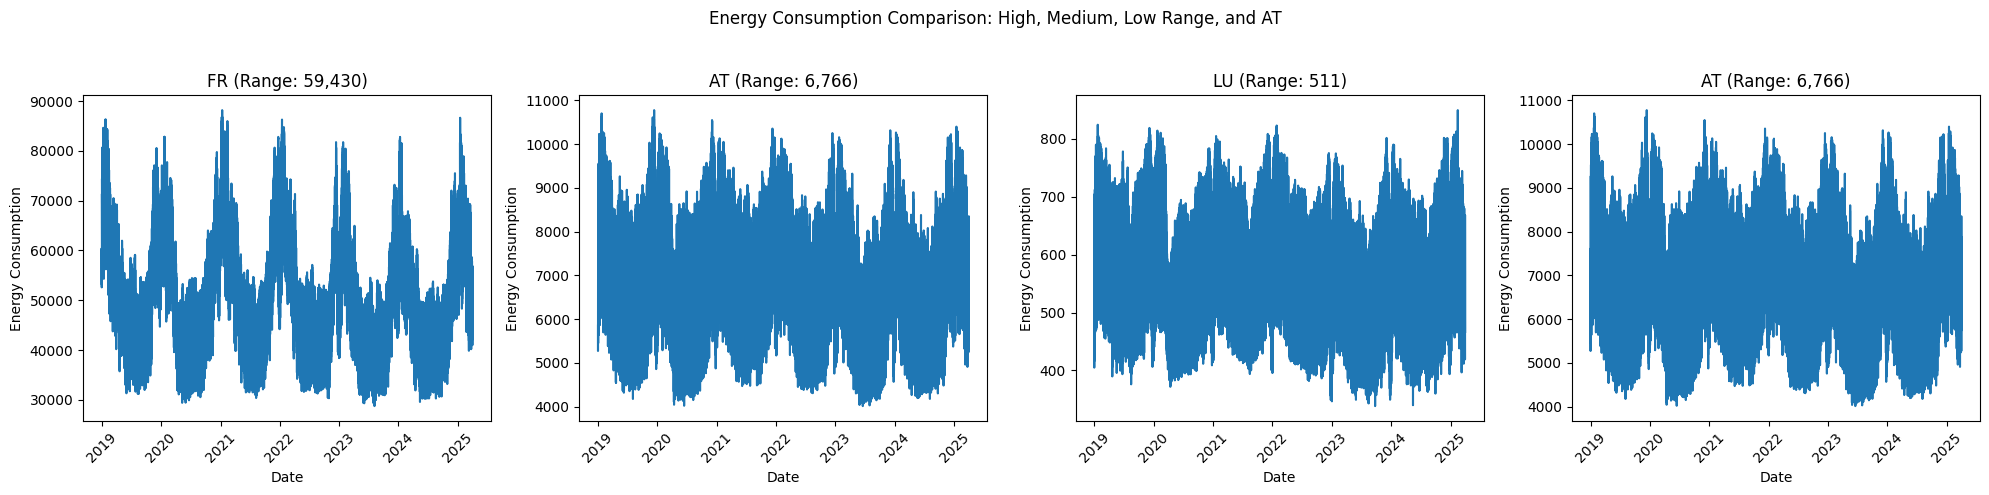

In [7]:
import matplotlib.pyplot as plt

selected_countries = [top_range, mid_range, low_range, 'AT']
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

for i, country in enumerate(selected_countries):
    subset = pre_df[pre_df['CountryCode'] == country]
    subset = subset.groupby('DateUTC')['Value'].mean().reset_index()

    axs[i].plot(subset['DateUTC'], subset['Value'], color='tab:blue')
    axs[i].set_title(f"{country} (Range: {subset['Value'].max() - subset['Value'].min():,.0f})")
    axs[i].set_xlabel('Date')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Energy Consumption')

plt.suptitle('Energy Consumption Comparison: High, Medium, Low Range, and AT')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 1. IMPORT LIBRARIES
----------------------

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LSTM, GRU, SimpleRNN,
    Conv1D, MaxPooling1D, GlobalAveragePooling1D,
    Flatten, Attention, BatchNormalization, Reshape
)


from tensorflow.keras.optimizers import Adam

2025-07-25 04:04:32.606286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753416272.804276      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753416272.861922      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. LOAD, EDA DATA & SPLIT DATA
------------------------------

In [10]:
# Hiển thị đẹp
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("/kaggle/input/preprocessing-dataset/preprocessed_energy_data_AT_2019_2025.csv")
df

,DateUTC,MeasureItem,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,hour,dayofweek,month,year
0,2019-01-01 00:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 00:00:00,1970-01-01 01:00:00,AT,100,5852.5,5852.5,0,1,1,2019
1,2019-01-01 01:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 01:00:00,1970-01-01 02:00:00,AT,100,5619.2,5619.2,1,1,1,2019
2,2019-01-01 02:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 02:00:00,1970-01-01 03:00:00,AT,100,5323.9,5323.9,2,1,1,2019
3,2019-01-01 03:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 03:00:00,1970-01-01 04:00:00,AT,100,5273.3,5273.3,3,1,1,2019
4,2019-01-01 04:00:00,Monthly Hourly Load Values,2019-01-01,1970-01-01 04:00:00,1970-01-01 05:00:00,AT,100,5439.0,5439.0,4,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54763,2025-03-31 19:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 19:00:00,1970-01-01 20:00:00,AT,100,7196.0,7196.0,19,0,3,2025
54764,2025-03-31 20:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 20:00:00,1970-01-01 21:00:00,AT,100,6896.8,6896.8,20,0,3,2025
54765,2025-03-31 21:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 21:00:00,1970-01-01 22:00:00,AT,100,6434.1,6434.1,21,0,3,2025
54766,2025-03-31 22:00:00,Monthly Hourly Load Values,2025-03-31,1970-01-01 22:00:00,1970-01-01 23:00:00,AT,100,6102.1,6102.1,22,0,3,2025


In [11]:
print("Kích thước tập dữ liệu:", df.shape)
print("\n Các cột dữ liệu:", df.columns.tolist())
print("\n Missing values:\n", df.isnull().sum())
print("\n Dòng trùng lặp:", df.duplicated().sum())
print("\n Thống kê cơ bản Value:\n", df['Value'].describe())


Kích thước tập dữ liệu: (54768, 13)

 Các cột dữ liệu: ['DateUTC', 'MeasureItem', 'DateShort', 'TimeFrom', 'TimeTo', 'CountryCode', 'Cov_ratio', 'Value', 'Value_ScaleTo100', 'hour', 'dayofweek', 'month', 'year']

 Missing values:
 DateUTC             0
MeasureItem         0
DateShort           0
TimeFrom            0
TimeTo              0
CountryCode         0
Cov_ratio           0
Value               0
Value_ScaleTo100    0
hour                0
dayofweek           0
month               0
year                0
dtype: int64

 Dòng trùng lặp: 0

 Thống kê cơ bản Value:
 count    54768.000000
mean      6973.847712
std       1332.788551
min       4013.500000
25%       5907.575000
50%       6922.400000
75%       7930.725000
max      10779.000000
Name: Value, dtype: float64


In [12]:
print("\n Cov_ratio stats (độ phủ dữ liệu):\n", df['Cov_ratio'].describe())


 Cov_ratio stats (độ phủ dữ liệu):
 count    54768.0
mean       100.0
std          0.0
min        100.0
25%        100.0
50%        100.0
75%        100.0
max        100.0
Name: Cov_ratio, dtype: float64


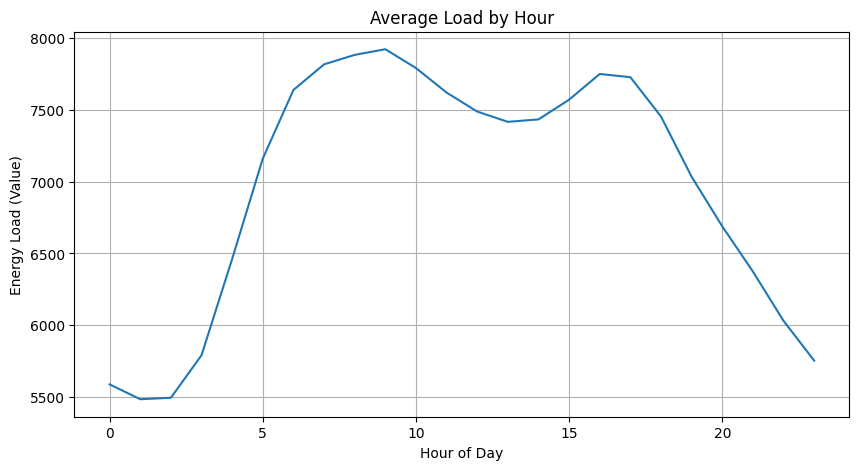

In [13]:
plt.figure(figsize=(10,5))
df.groupby('hour')['Value'].mean().plot()
plt.title("Average Load by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Load (Value)")
plt.grid()
plt.show()


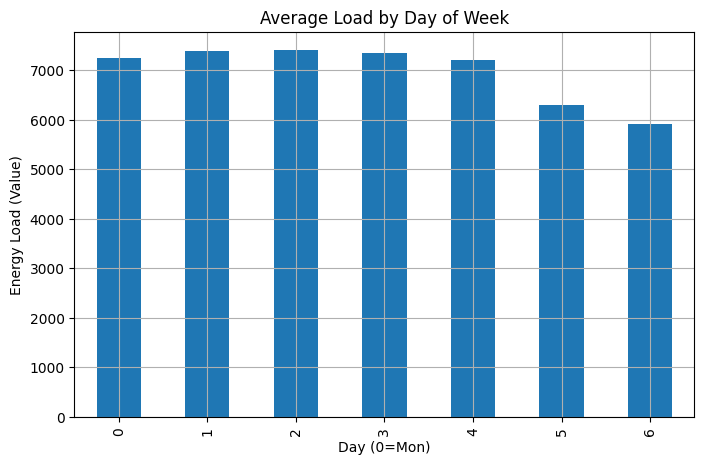

In [14]:
plt.figure(figsize=(8,5))
df.groupby('dayofweek')['Value'].mean().plot(kind='bar')
plt.title("Average Load by Day of Week")
plt.xlabel("Day (0=Mon)")
plt.ylabel("Energy Load (Value)")
plt.grid()
plt.show()


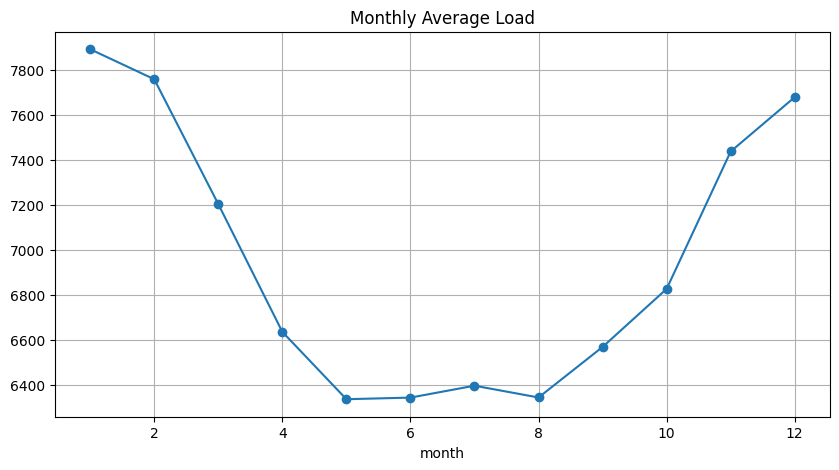

In [15]:
plt.figure(figsize=(10,5))
df.groupby('month')['Value'].mean().plot(marker='o')
plt.title("Monthly Average Load")
plt.grid()
plt.show()


## Train test split

In [16]:
df['DateUTC'] = pd.to_datetime(df['DateUTC'])
df.set_index('DateUTC', inplace=True)

# Training: 2019–2024, Testing: 2025
train_df_full = df[df.index.year < 2025]
test_df = df[df.index.year == 2025]

# Split validation from end of 2024 (10% of training)
val_ratio = 0.1
val_size = int(len(train_df_full) * val_ratio)
val_df = train_df_full.iloc[-val_size:]
train_df = train_df_full.iloc[:-val_size]

# In thông tin tóm tắt
print("Train shape:", train_df.shape)
print("Validiont shape:", val_df.shape)
print("Test shape:", test_df.shape)



Train shape: (47348, 12)
Validiont shape: (5260, 12)
Test shape: (2160, 12)


# 3. SCALING & SEQUENCE CREATION
------------------------------

In [17]:
def create_sequences(data, seq_len=24, output_len=1):
    X, y = [], []
    for i in range(seq_len, len(data) - output_len + 1):
        X.append(data[i - seq_len:i])
        y.append(data[i:i + output_len].flatten())
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaler.fit(df[['Value']])
train_scaled = scaler.transform(train_df[['Value']])
val_scaled   = scaler.transform(val_df[['Value']])
test_scaled  = scaler.transform(test_df[['Value']])

seq_len = 24
output_len = 1

X_train, y_train = create_sequences(train_scaled, seq_len, output_len)
X_val, y_val     = create_sequences(val_scaled, seq_len, output_len)
X_test, y_test   = create_sequences(test_scaled, seq_len, output_len)

# 4. METRICS FUNCTION
------------------------------

In [18]:
def evaluate_model(y_true, y_pred, scaler=None):
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)
    if scaler:
        y_true = scaler.inverse_transform(y_true.reshape(-1, 1))
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return round(rmse, 2), round(mae, 2), round(mape, 2), y_true, y_pred

# 5. MODEL DEFINITIONS
-----------------------------

## a. Best Ensemble-base model: XGboost

In [19]:
def build_xgboost():
    return XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

In [20]:
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)
y_train_xgb = y_train.ravel()
y_test_xgb = y_test.ravel()

preds_dict = {}
results = []
print("Training XGBoost...")
xgb = build_xgboost()
xgb.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb.predict(X_test_xgb).reshape(-1, 1)
rmse, mae, mape, _, y_pred_inv = evaluate_model(y_test, y_pred_xgb, scaler)
preds_dict["XGBoost"] = y_pred_inv
results.append({"Model": "XGBoost", "RMSE": rmse, "MAE": mae, "MAPE": mape})

Training XGBoost...


## b. Best Deeplearning-base models: GRU & LSTM

In [21]:
def build_lstm(input_shape, output_len=1):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_len))
    return model

def build_gru(input_shape, output_len=1):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_len))
    return model

def build_lstm_gru(input_shape, output_len=1):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(GRU(32))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_len))
    return model

## c. Best hybrid models:

In [22]:
def build_dnn_cnn_attention(input_shape, output_len=1):
    inputs = Input(shape=input_shape)

    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)

    # Reshape lại để CNN + Attention
    reshaped_dim = 16
    x = Dense(reshaped_dim * 8, activation='relu')(x)
    x = Reshape((8, reshaped_dim))(x)  # (batch, time, features)

    x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = Attention()([x, x])
    x = GlobalAveragePooling1D()(x)

    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_len)(x)
    return Model(inputs, outputs)


def build_dnn_lstm_attention(input_shape, output_len=1):
    inputs = Input(shape=input_shape)

    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Reshape để LSTM đọc chuỗi
    x = Dense(64 * 2)(x)
    x = Reshape((2, 64))(x)  # 2 time steps, 64 features

    x = LSTM(64, return_sequences=True)(x)
    x = Attention()([x, x])
    x = Flatten()(x)

    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_len)(x)
    return Model(inputs, outputs)


# Hybrid - DNN + GRU + Attention (NEW)
def build_dnn_gru_attention(input_shape, output_len=1):
    inputs = Input(shape=input_shape)

    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Reshape để GRU hoạt động đúng
    x = Dense(64 * 2)(x)
    x = Reshape((2, 64))(x)

    x = GRU(64, return_sequences=True)(x)
    x = Attention()([x, x])
    x = Flatten()(x)

    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_len)(x)
    return Model(inputs, outputs)


In [23]:
# deep conv with batchnormalization and dropout
def build_cnn_lstm_attention_v1(input_shape, output_len=1):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv1D(64, 3, padding='same', activation='relu')(inputs)
    x = Conv1D(64, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)

    # Block 2
    x = Conv1D(128, 3, padding='same', activation='relu')(x)
    x = Conv1D(128, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)

    # Block 3
    x = Conv1D(256, 3, padding='same', activation='relu')(x)
    x = Conv1D(256, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)

    # Block 4
    x = Conv1D(512, 3, padding='same', activation='relu')(x)
    x = Conv1D(512, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)

    # LSTM + Attention
    x = LSTM(64, return_sequences=True)(x)
    x = Attention()([x, x])
    x = GlobalAveragePooling1D()(x)

    # Dense
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(output_len)(x)
    return Model(inputs, outputs)

def build_cnn_lstm_attention_v2(input_shape, output_len=1):
    inputs = Input(shape=input_shape)

    # CNN Blocks
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2)(x)

    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2)(x)

    # Deep LSTM + Attention
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Attention()([x, x])
    x = Flatten()(x)

    # Dense
    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_len)(x)
    return Model(inputs, outputs)

# 6. TRAINING FUNCTION
------------------------------

In [24]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    model.compile(optimizer=Adam(1e-4), loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    return model, history

# 7. MAIN LOOP TO TRAIN MODELS
------------------------------

In [25]:
def train_model_group(model_dict, group_name, X_train, y_train, X_val, y_val, X_test, y_test, scaler, output_len=1, epochs=20):
    results = []
    preds_dict = {}

    for name, build_fn in model_dict.items():
        print(f"\n[Group: {group_name}] Training {name}...")
        model = build_fn(X_train.shape[1:], output_len=output_len)
        model, _ = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs)

        # Predict
        y_pred = model.predict(X_test)
        rmse, mae, mape, y_true, y_pred_inv = evaluate_model(y_test, y_pred, scaler)

        # Save results
        preds_dict[name] = y_pred_inv
        results.append({"Model": f"{group_name} - {name}", "RMSE": rmse, "MAE": mae, "MAPE": mape})

    return results, preds_dict

In [26]:
# 1. Deep Learning Group
dl_models = {
    "LSTM": build_lstm,
    "GRU": build_gru,
    "LSTM_GRU": build_lstm_gru
}

dl_results, dl_preds = train_model_group(
    dl_models, group_name="DL",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler, output_len=1, epochs=20
)


[Group: DL] Training LSTM...


I0000 00:00:1753360191.713474      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753360191.714213      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1753360196.311788     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0277 - val_loss: 0.0048
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0011 - val_loss: 7.9596e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 8.9936e-04 - val_loss: 7.3678e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.8908e-04 - val_loss: 6.1258e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.4039e-04 - val_loss: 6.2950e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.3736e-04 - val_loss: 6.6378e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.1802e-04 - val_loss: 5.7393e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 6.9729e-04 - val_loss: 0.0011
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.0375e-04 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0397 - val_loss: 0.0028
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0010 - val_loss: 7.1892e-04
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 8.4343e-04 - val_loss: 7.9918e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 8.1063e-04 - val_loss: 6.4731e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.8121e-04 - val_loss: 6.3158e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.6954e-04 - val_loss: 6.5375e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.4137e-04 - val_loss: 6.3291e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.3160e-04 - val_loss: 6.0599e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7.0639e-04 - val_loss: 5.7555e-04
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 6.8762

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0479 - val_loss: 0.0052
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0010 - val_loss: 7.8511e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 7.9854e-04 - val_loss: 8.5178e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 7.3810e-04 - val_loss: 6.1827e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.9529e-04 - val_loss: 5.6769e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.6874e-04 - val_loss: 5.5053e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.5086e-04 - val_loss: 5.2897e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.2025e-04 - val_loss: 6.6082e-04
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 6.040

In [27]:
# 2. Hybrid Attention Group
hybrid_models = {
    "DNN + CNN + Attention": build_dnn_cnn_attention,
    "DNN + LSTM + Attention": build_dnn_lstm_attention,
    "DNN + GRU + Attention": build_dnn_gru_attention,
    "CNN + LSTM + Attention v1": build_cnn_lstm_attention_v1,
    "CNN + LSTM + Attention v2": build_cnn_lstm_attention_v2
}

hybrid_results, hybrid_preds = train_model_group(
    hybrid_models, group_name="Hybrid",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler, output_len=1, epochs=20
)


[Group: Hybrid] Training DNN + CNN + Attention...
Epoch 1/20


I0000 00:00:1753360721.270354     109 service.cc:148] XLA service 0x50788330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753360721.276183     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753360721.276211     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  72/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1844  

I0000 00:00:1753360724.975519     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0389 - val_loss: 0.0013
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0010 - val_loss: 6.6942e-04
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.4904e-04 - val_loss: 5.1655e-04
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.0090e-04 - val_loss: 4.7352e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.2397e-04 - val_loss: 3.8634e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.7869e-04 - val_loss: 3.5144e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.5111e-04 - val_loss: 3.2559e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.2806e-04 - val_loss: 3.0899e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0924e-04 - val_loss: 3.0727e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.9852e-04 - val_loss: 3.6295e-04
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - loss: 0.0157 - val_loss: 8.9980e-04
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0037 - val_loss: 6.2344e-04
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0031 - val_loss: 6.0164e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0026 - val_loss: 3.7668e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0021 - val_loss: 3.7353e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0018 - val_loss: 4.1130e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0016 - val_loss: 3.5453e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0014 - val_loss: 3.2760e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0013 - val_loss: 2.8829e-04
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0011 - 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

[Group: Hybrid] Training CNN + LSTM + Attention v2...
Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0355 - val_loss: 0.0013
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0010 - val_loss: 4.5241e-04
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 5.2393e-04 - val_loss: 3.3900e-04
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 3.9249e-04 - val_loss: 3.2137e-04
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 3.4913e-04 - val_loss: 2.7951e-04
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 3.2811e-04 - val_loss: 3.0624e-04
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 3.1351e-04 - val_loss: 3.1462e-04
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 2.7897e-04 - val_loss: 2.7142e-04
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 2.7964e-04 - val_loss: 2.3103e-04
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 

# 8. EVALUATION SUMMARY & PREDICTION PLOT
------------------------------

In [28]:
 try:
    all_results_df
except NameError:
    all_results_df = pd.DataFrame()

# Sau đó ghép tiếp
all_results_df = pd.concat([
    all_results_df,
    pd.DataFrame(results)
], ignore_index=True).sort_values(by="RMSE")


In [29]:
from IPython.display import display, HTML

# Make notebook cells wider
display(HTML("<style>.container { width:100% !important; }</style>"))

# Combine all results from DL, Hybrid, and XGBoost (multistep)
all_results_df = pd.concat([
    pd.DataFrame(dl_results),         # deep learning models
    pd.DataFrame(hybrid_results),     # hybrid attention models
    pd.DataFrame(results)                # traditional models (e.g., XGBoost)
], ignore_index=True)

# Sort and display
all_results_df = all_results_df.sort_values(by="RMSE")
display(all_results_df)


,Model,RMSE,MAE,MAPE
6,Hybrid - CNN + LSTM + Attention v1,107.55,82.70,1.09
7,Hybrid - CNN + LSTM + Attention v2,116.17,87.58,1.16
3,Hybrid - DNN + CNN + Attention,117.98,89.77,1.19
8,XGBoost,142.92,109.05,1.45
2,DL - LSTM_GRU,153.28,119.56,1.60
1,DL - GRU,157.55,123.06,1.67
0,DL - LSTM,162.09,120.80,1.61
4,Hybrid - DNN + LSTM + Attention,372.06,336.76,4.35
5,Hybrid - DNN + GRU + Attention,501.72,466.73,6.06


In [30]:
# Ensure y_train and y_test are 2D arrays before inverse scaling
y_train_flat = y_train.reshape(-1, 1)
y_test_flat = y_test.reshape(-1, 1)

# Combine ground truth values and inverse scale
y_true_scaled = np.concatenate([y_train_flat, y_test_flat])  # shape: (total_samples, 1)
y_true = scaler.inverse_transform(y_true_scaled).flatten()   # shape: (total_samples,)

# Index to mark where the test set starts (for plotting later)
split_idx = len(y_train_flat)


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_partial_predictions(y_true, preds_dict, split_idx, group_title, window_size=1000, start_idx=None):
    """
    Plot model predictions with ground truth for both train and test in a limited window.

    Args:
        y_true (np.array): Full ground truth values (train + test) - already inverse_scaled
        preds_dict (dict): model_name -> predicted y (inverse_scaled, test only)
        split_idx (int): index where test set starts
        group_title (str): name of group of models
        window_size (int): number of time steps to show
        start_idx (int or None): starting point of the window (default: split_idx - window_size//2)
    """
    for model_name, y_pred in preds_dict.items():
        plt.figure(figsize=(14, 5))

        # Define window
        if start_idx is None:
            start_idx = max(split_idx - window_size // 2, 0)
        end_idx = start_idx + window_size

        # Range for prediction alignment
        pred_start = split_idx
        pred_end = pred_start + len(y_pred)

        # Plot ground truth slice
        indices = np.arange(start_idx, end_idx)
        plt.plot(indices, y_true[start_idx:end_idx], label="Ground Truth", linewidth=2)

        # Plot predictions if inside visible window
        visible_pred_start = max(pred_start, start_idx)
        visible_pred_end = min(pred_end, end_idx)
        pred_visible_range = visible_pred_end - visible_pred_start
        if pred_visible_range > 0:
            pred_offset = visible_pred_start - pred_start
            plt.plot(
                np.arange(visible_pred_start, visible_pred_end),
                y_pred[pred_offset:pred_offset + pred_visible_range],
                label=model_name
            )

        # Train/Test split line
        if start_idx <= split_idx <= end_idx:
            plt.axvline(x=split_idx, color='red', linestyle='--', label="Train/Test Split")

        plt.title(f"{group_title}: {model_name}")
        plt.xlabel("Time Step")
        plt.ylabel("Energy Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [32]:

# Gộp toàn bộ các dictionary dự đoán
all_preds = {}

all_preds.update(dl_preds)
all_preds.update(hybrid_preds)
all_preds.update(preds_dict)


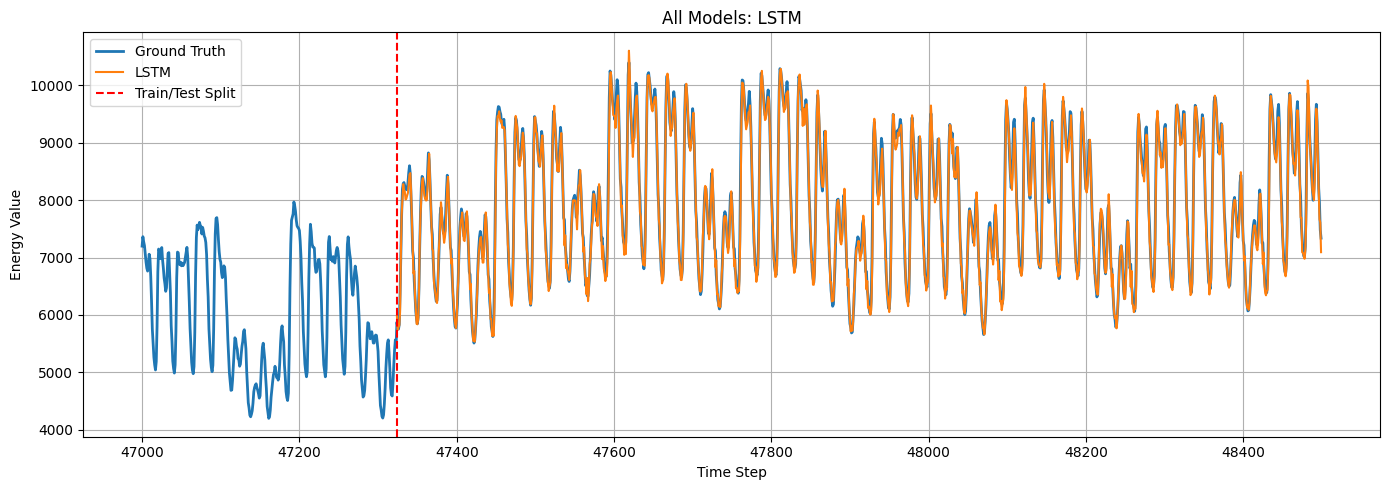

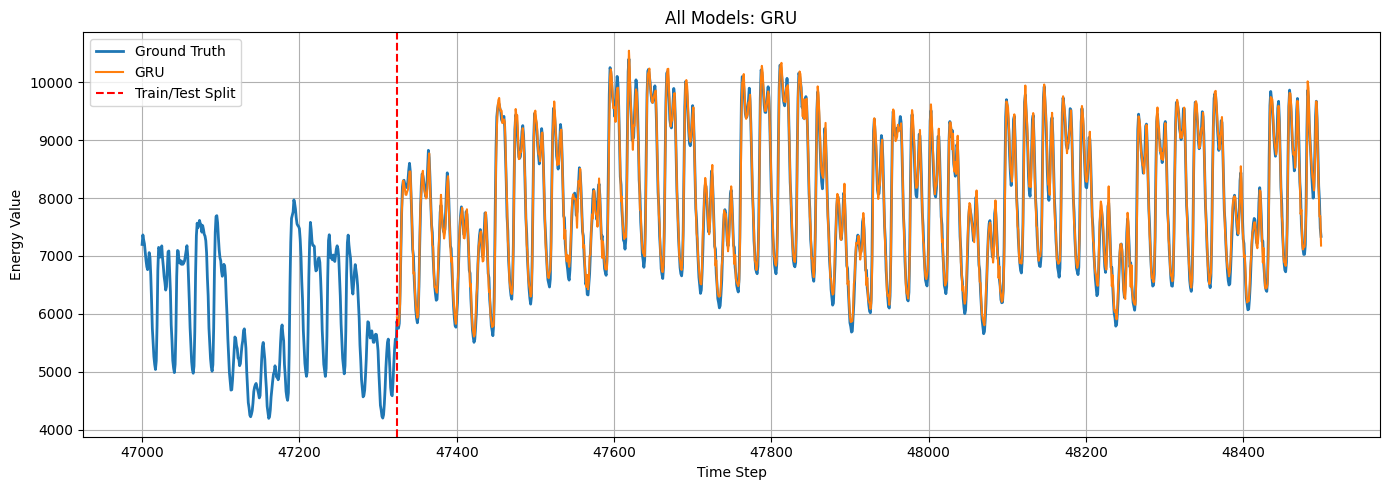

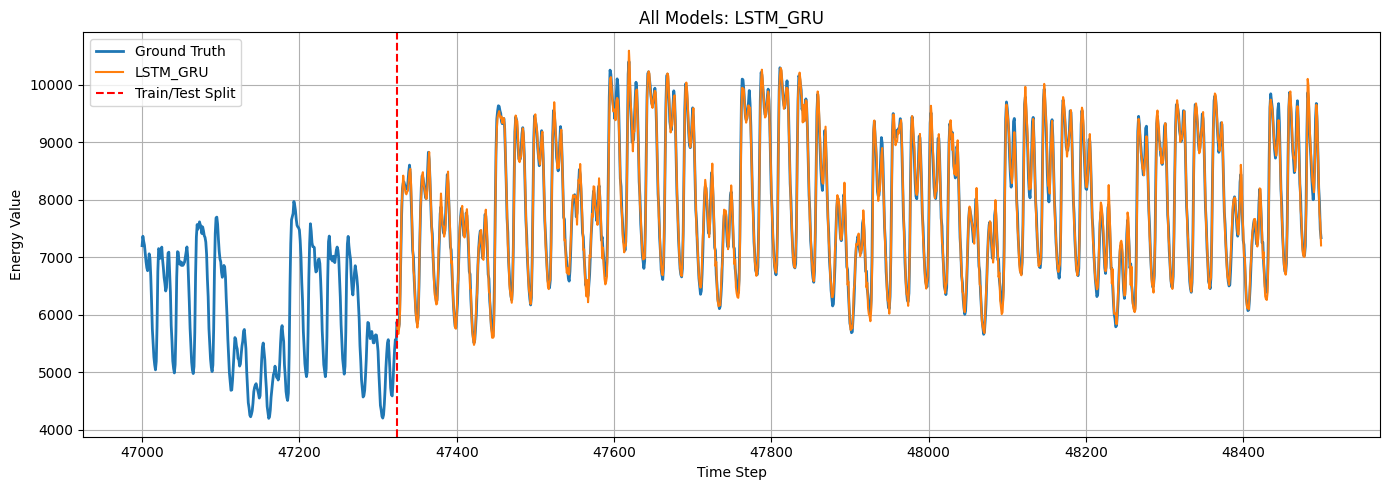

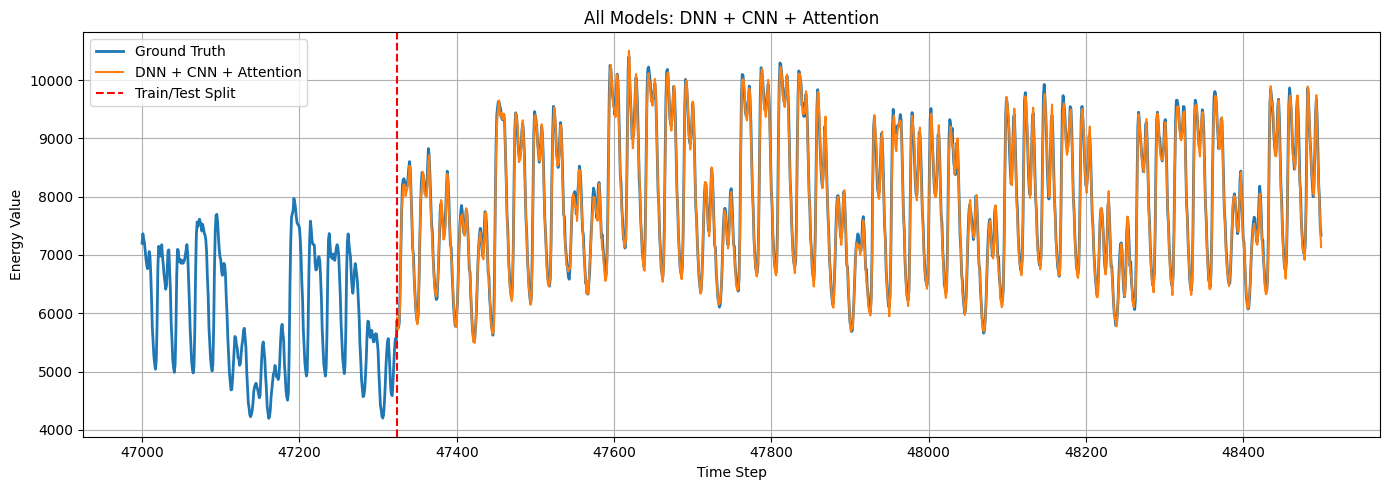

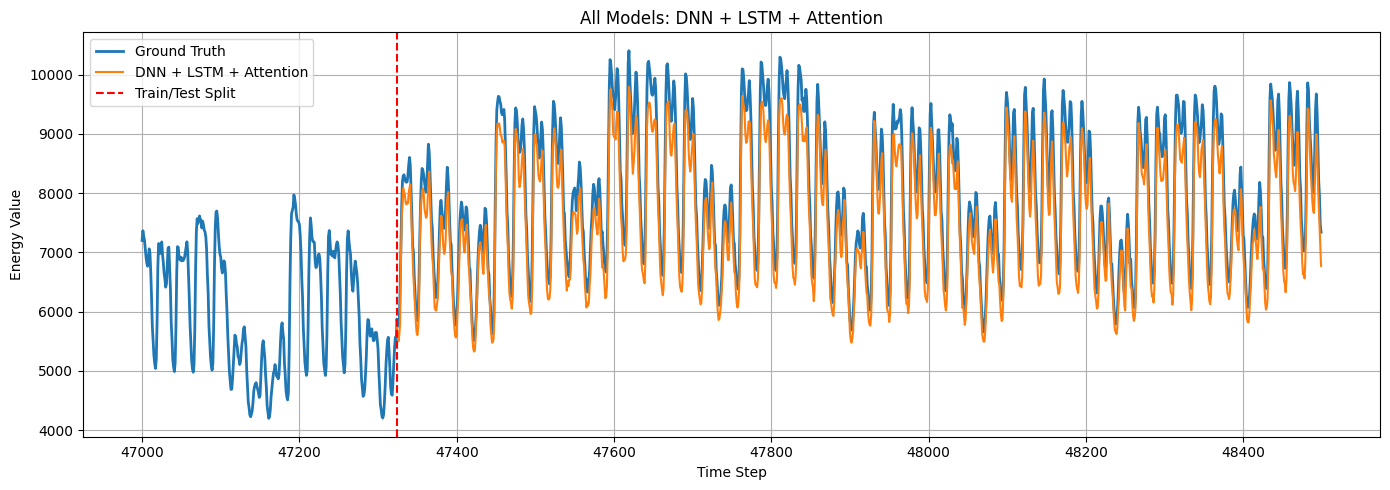

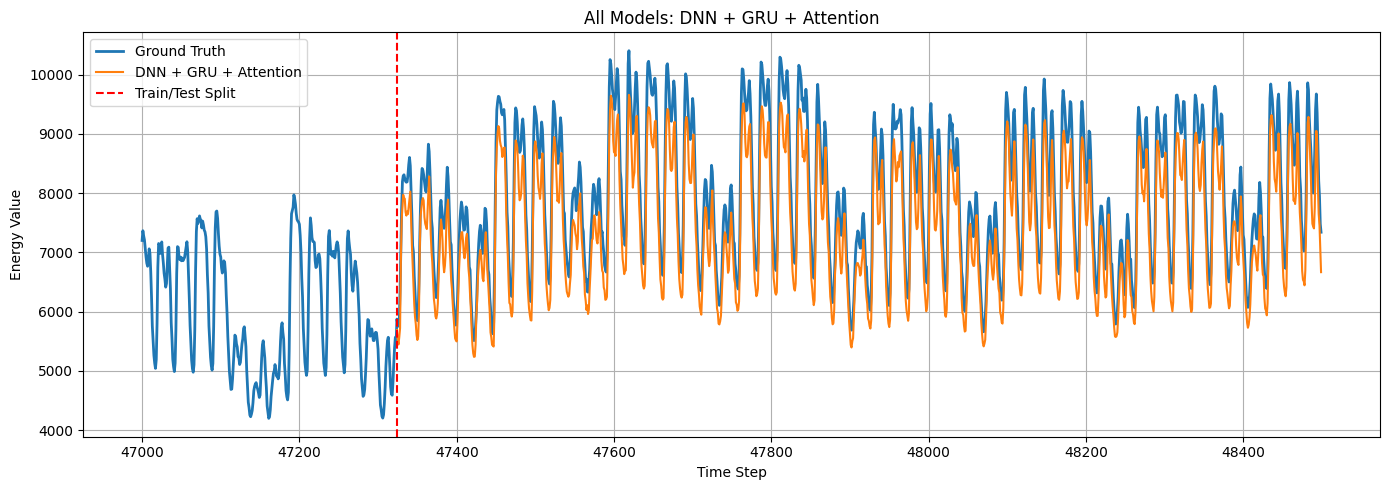

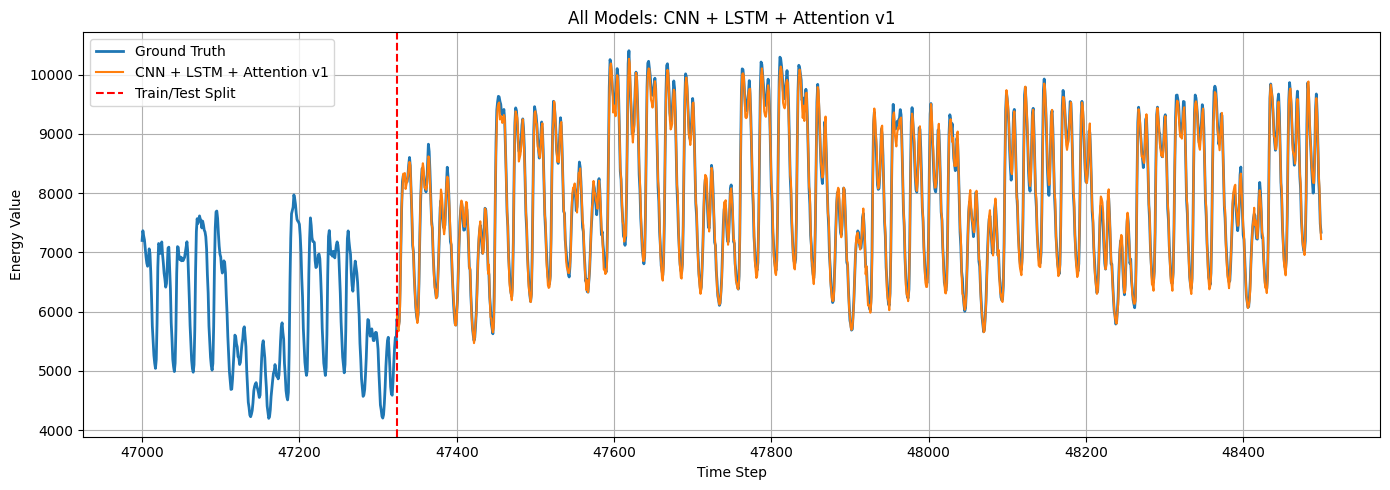

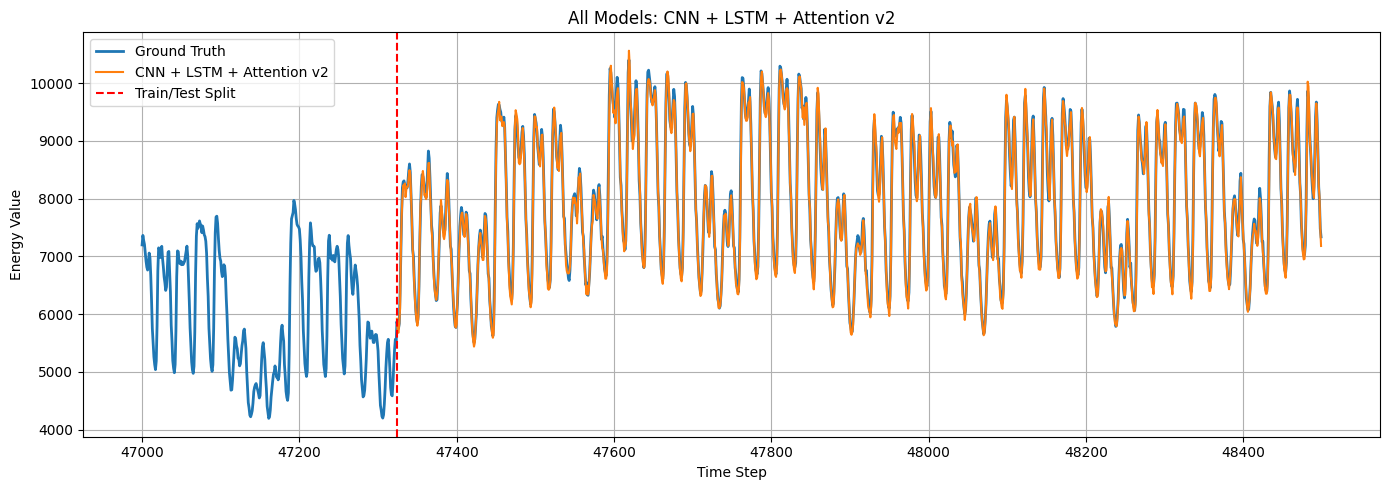

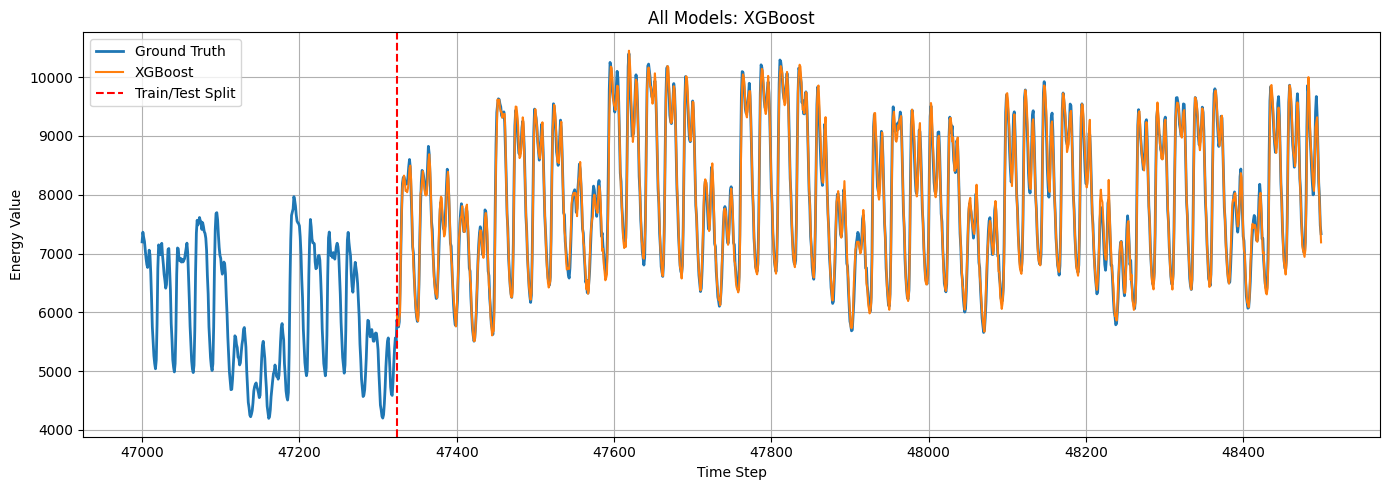

In [33]:
# y_true must be full inverse-scaled ground truth (train + test)
# split_idx = len(y_train)
# all_preds = {**dl_preds, **hybrid_preds, **preds_dict}

plot_partial_predictions(
    y_true=y_true,                  # full true values (already inverse-scaled)
    preds_dict=all_preds,           # all predictions (from test only)
    split_idx=split_idx,
    group_title="All Models",
    window_size=1500,               # show 1500 steps only
    start_idx=47000                 # focus on test region (optional)
)


# 9. multi-step forecasting (24-hour ahead)
-------------------------------------------

## a, XGBoost model

In [57]:
# Tạo dữ liệu multi-step từ series đã scale
seq_len = 24
output_len = 24

X_train_xgb, y_train_xgb = create_sequences(train_scaled, seq_len, output_len)
X_val_xgb, y_val_xgb     = create_sequences(val_scaled, seq_len, output_len)
X_test_xgb, y_test_xgb   = create_sequences(test_scaled, seq_len, output_len)

# Reshape để phù hợp XGBoost (samples, features)
X_train_xgb = X_train_xgb.reshape(X_train_xgb.shape[0], -1)
X_test_xgb  = X_test_xgb.reshape(X_test_xgb.shape[0], -1)

# Flatten y cho XGBoost multioutput strategy
y_train_xgb = y_train_xgb  # shape: (samples, 24)
y_test_xgb  = y_test_xgb


In [58]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# Khởi tạo XGBoost + MultiOutput wrapper
base_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_multi = MultiOutputRegressor(base_xgb)

# Train
xgb_multi.fit(X_train_xgb, y_train_xgb)

# Predict
y_pred_xgb = xgb_multi.predict(X_test_xgb)  # shape: (samples, 24)


In [59]:
# Inverse transform dự đoán và ground truth
y_test_inv = scaler.inverse_transform(y_test_xgb.reshape(-1, 1)).reshape(y_test_xgb.shape)
y_pred_inv = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1)).reshape(y_pred_xgb.shape)

# Flatten để tính metric
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_test_flat = y_test_inv.flatten()
y_pred_flat = y_pred_inv.flatten()

rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
mae = mean_absolute_error(y_test_flat, y_pred_flat)
mape = np.mean(np.abs((y_test_flat - y_pred_flat) / (y_test_flat + 1e-8))) * 100

# Lưu kết quả
ms_preds_dict = {}
ms_results = []
ms_preds_dict["XGBoost"] = y_pred_inv
ms_results.append({"Model": "XGBoost", "RMSE": round(rmse, 2), "MAE": round(mae, 2), "MAPE": round(mape, 2)})


## b. Deeplearning-base model

In [61]:
X_train, y_train = create_sequences(train_scaled, seq_len=24, output_len=24)
X_val, y_val = create_sequences(val_scaled, seq_len=24, output_len=24)
X_test, y_test = create_sequences(test_scaled, seq_len=24, output_len=24)


In [62]:
def train_multistep_model_group(
    model_dict, group_name,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    scaler,
    output_len=24,
    epochs=20
):
    results = []
    preds_dict = {}

    for name, build_fn in model_dict.items():
        print(f"\n[Group: {group_name}] Training {name}...")

        # Build model
        model = build_fn(X_train.shape[1:], output_len=output_len)
        model, _ = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs)

        # Predict
        y_pred = model.predict(X_test)  # shape: (n_samples, output_len)

        if y_pred.shape != y_test.shape:
            print(f"Warning: Shape mismatch! y_test: {y_test.shape}, y_pred: {y_pred.shape}")
            continue

        # Inverse transform correctly
        # Reshape both to (-1, 1) for scaling, then reshape back
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)


        # Flatten both
        y_test_flat = y_test_inv.flatten()
        y_pred_flat = y_pred_inv.flatten()

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
        mae = mean_absolute_error(y_test_flat, y_pred_flat)
        mape = np.mean(np.abs((y_test_flat - y_pred_flat) / (y_test_flat + 1e-8))) * 100


        results.append({
            "Model": f"{group_name} - {name}",
            "RMSE": round(rmse, 2),
            "MAE": round(mae, 2),
            "MAPE": round(mape, 2)
        })

        preds_dict[name] = y_pred_inv

    return results, preds_dict, y_test_inv


In [63]:
# Define DL multi-step models
dl_multistep_models = {
    "LSTM": build_lstm,
    "GRU": build_gru,
    "LSTM_GRU": build_lstm_gru
}

# Train multi-step
dl_ms_results, dl_ms_preds, y_test_inv1  = train_multistep_model_group(
    model_dict=dl_multistep_models,
    group_name="DL-Multistep",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler,
    output_len=24,
    epochs=20
)



[Group: DL-Multistep] Training LSTM...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0745 - val_loss: 0.0165
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0107 - val_loss: 0.0113
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0102 - val_loss: 0.0106
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0101 - val_loss: 0.0103
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 12/20
1479/1479 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0761 - val_loss: 0.0178
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0162 - val_loss: 0.0129
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0122 - val_loss: 0.0124
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0097 - val_loss: 0.0100
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 12/20
1479/1479 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0666 - val_loss: 0.0152
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0099 - val_loss: 0.0102
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0097 - val_loss: 0.0101
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0093 - val_loss: 0.0096
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 12/20
1479/1479 ━━━━━━━━━━

## c. Hybrid models

In [64]:
# Define Hybrid Multi-step models
hybrid_multistep_models = {
    "Dense + CNN + Att": build_dnn_cnn_attention,
    "Dense + LSTM + Att": build_dnn_lstm_attention,
    "Dense + GRU + Att": build_dnn_gru_attention,
    "CNN + LSTM + Att.v1": build_cnn_lstm_attention_v1,
    "CNN + LSTM + Att.v2": build_cnn_lstm_attention_v2
}

# Train
hybrid_ms_results, hybrid_ms_preds, y_test_inv2 = train_multistep_model_group(
    model_dict=hybrid_multistep_models,
    group_name="Hybrid-Multistep",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    scaler=scaler,
    output_len=24,
    epochs=20
)



[Group: Hybrid-Multistep] Training Dense + CNN + Att...
Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0788 - val_loss: 0.0134
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0080 - val_loss: 0.0083
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0073 - val_loss: 0.0086
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0068 - val_loss: 0.0076
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1479/1479 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 0.0687 - val_loss: 0.0085
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0187 - val_loss: 0.0067
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0130 - val_loss: 0.0063
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0104 - val_loss: 0.0059
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0063 - val_loss: 0.0052
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 11/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 12/20
1479/14

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

[Group: Hybrid-Multistep] Training CNN + LSTM + Att.v2...
Epoch 1/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0663 - val_loss: 0.0130
Epoch 2/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 3/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 5/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0071 - val_loss: 0.0077
Epoch 6/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 7/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 8/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 9/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0061 - val_loss: 0.0073
Epoch 10/20
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0059 - val_loss: 0.0065
Epoch 1

In [65]:
from IPython.display import display, HTML

# Make notebook cells wider
display(HTML("<style>.container { width:100% !important; }</style>"))

# Combine all multistep results into one DataFrame
all_multistep_results_df = pd.concat([
    pd.DataFrame(ms_results),
    pd.DataFrame(dl_ms_results),        # Deep Learning multistep results
    pd.DataFrame(hybrid_ms_results)        # hybrid multistep results (optional)
], ignore_index=True)

# Sort by RMSE
all_multistep_results_df = all_multistep_results_df.sort_values(by="RMSE")

# Display final result table
display(all_multistep_results_df)

,Model,RMSE,MAE,MAPE
7,Hybrid-Multistep - CNN + LSTM + Att.v1,461.79,337.92,4.38
8,Hybrid-Multistep - CNN + LSTM + Att.v2,485.39,350.18,4.60
0,XGBoost,500.59,346.36,4.61
4,Hybrid-Multistep - Dense + CNN + Att,537.65,390.18,5.16
5,Hybrid-Multistep - Dense + LSTM + Att,537.88,390.50,5.11
6,Hybrid-Multistep - Dense + GRU + Att,541.08,389.66,5.15
1,DL-Multistep - LSTM,612.76,450.66,6.02
2,DL-Multistep - GRU,613.91,447.89,5.98
3,DL-Multistep - LSTM_GRU,634.02,460.91,6.15


In [66]:
# Gộp kết quả dự đoán từ 2 nhóm model
all_preds = {}
all_preds.update(ms_preds_dict)
all_preds.update(dl_ms_preds)
all_preds.update(hybrid_ms_preds)


In [67]:
import matplotlib.pyplot as plt

def plot_multistep_forecast(y_true, y_pred, steps=24, start_index=0, model_name="Model", save=False):
    """
    Plot predicted vs true values for multi-step forecasting.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(range(steps), y_true[start_index], label="Ground Truth", marker='o')
    plt.plot(range(steps), y_pred[start_index], label="Prediction", marker='x')
    plt.title(f"Multi-step Forecast - {model_name}")
    plt.xlabel("Forecast Step")
    plt.ylabel("Energy Consumption")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save:
        plt.savefig(f"figures/{model_name.replace(' ', '_')}_forecast.png", dpi=300)
    plt.show()


In [68]:
assert np.allclose(y_test_inv1, y_test_inv2)
y_test_inv = y_test_inv1

In [71]:
from sklearn.metrics import mean_squared_error
import numpy as np

def find_best_fit_samples(y_true, pred_dict, model_1, model_2, top_k=3):
    errors = []

    for i in range(len(y_true)):
        err1 = mean_squared_error(y_true[i], pred_dict[model_1][i])
        err2 = mean_squared_error(y_true[i], pred_dict[model_2][i])
        total_error = err1 + err2
        errors.append((i, total_error))

    best_samples = sorted(errors, key=lambda x: x[1])[:top_k]
    return best_samples


🔍 Best-fit sample index (for CNN + LSTM + Att.v1 + CNN + LSTM + Att.v2): 725


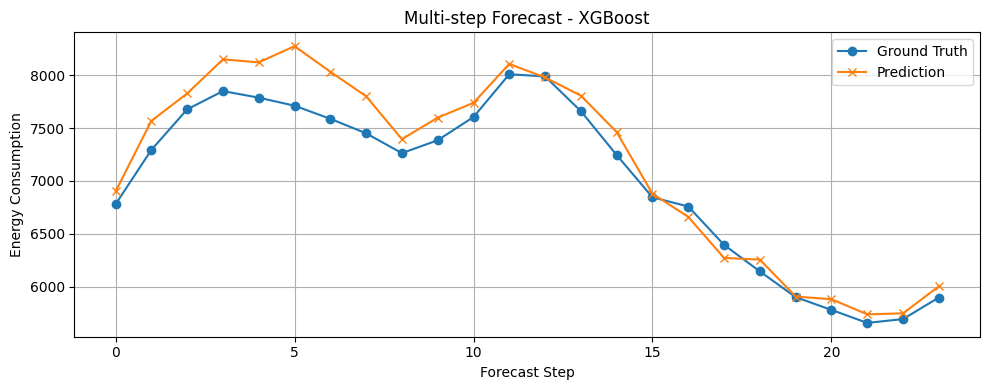

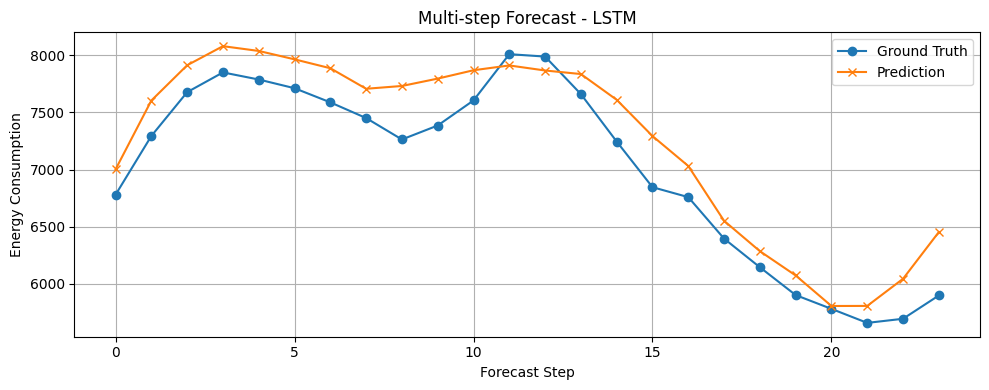

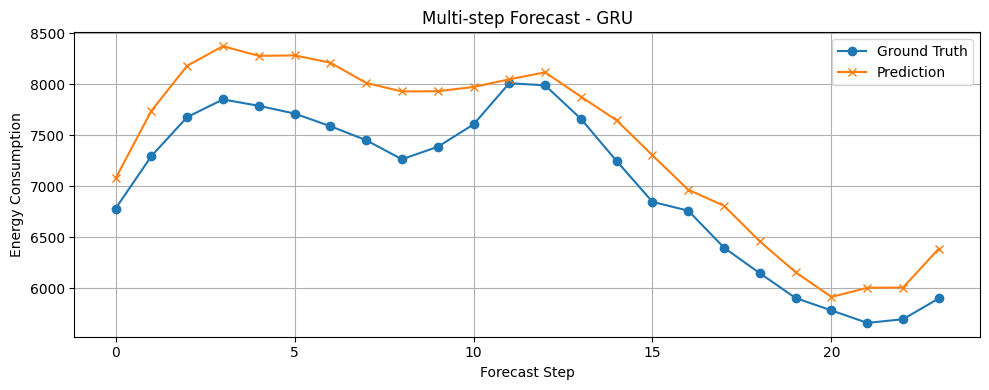

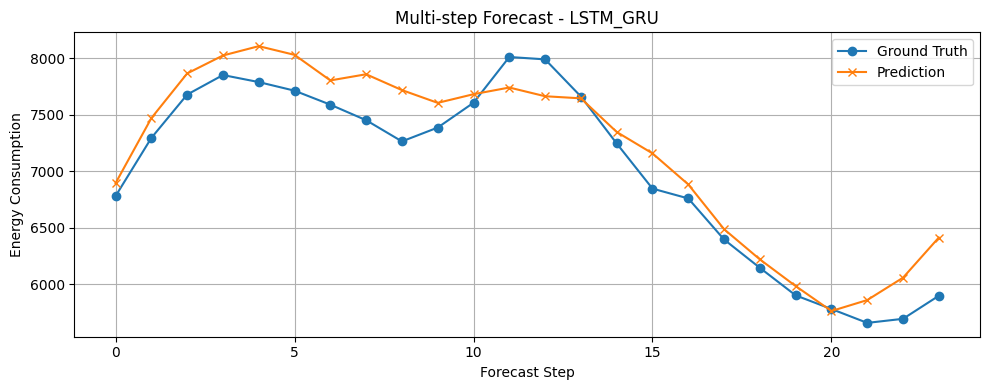

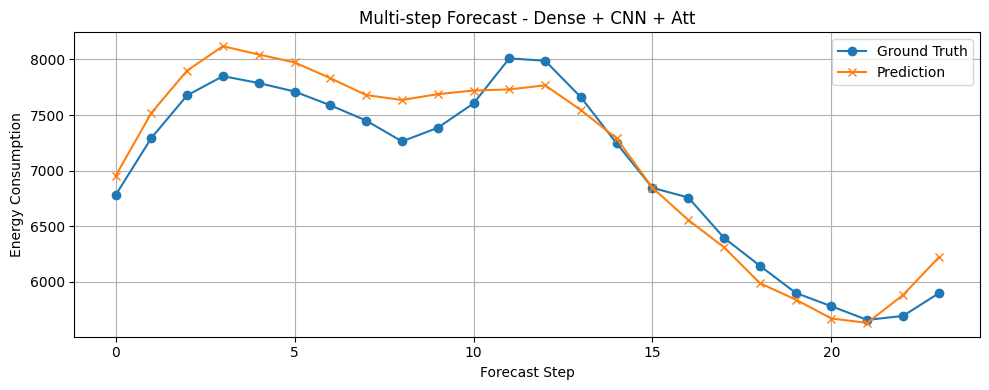

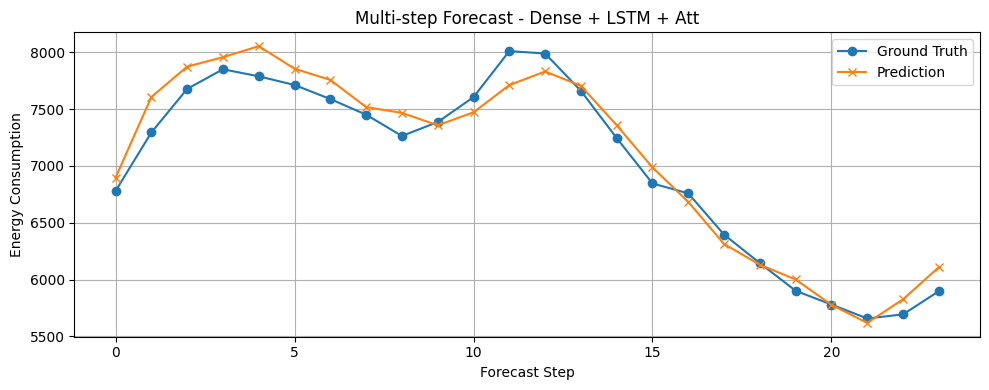

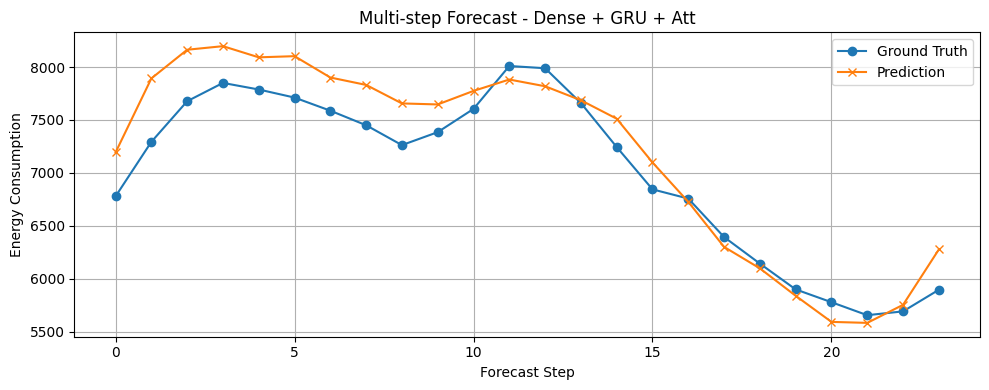

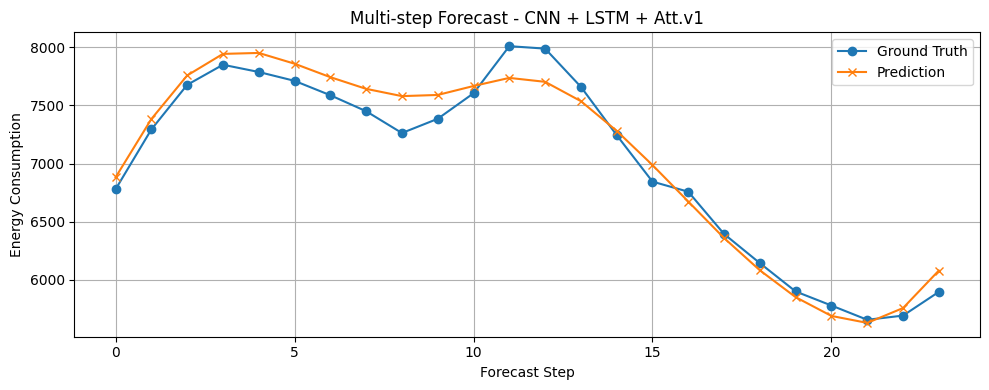

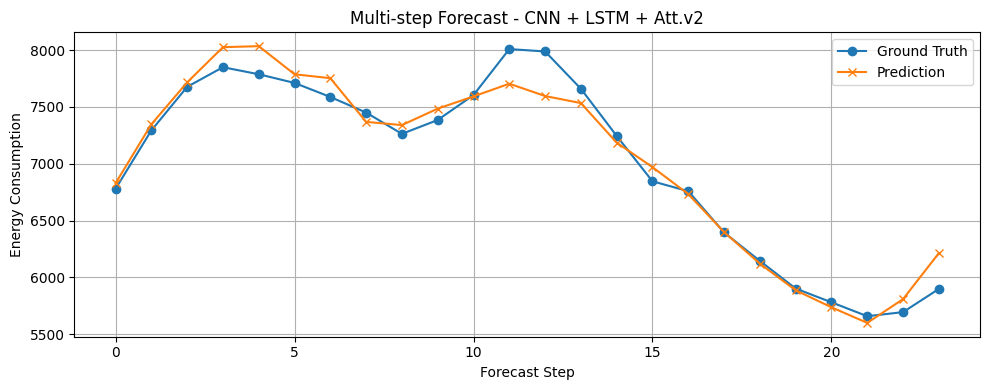

In [73]:
# Tên 2 model chính bạn muốn đánh giá
model_1 = "CNN + LSTM + Att.v1"
model_2 = "CNN + LSTM + Att.v2"

# Tìm sample có tổng lỗi thấp nhất cho 2 model
best_samples = find_best_fit_samples(y_test_inv, all_preds, model_1, model_2, top_k=1)
best_idx = best_samples[0][0]  # chỉ lấy index

print(f"🔍 Best-fit sample index (for {model_1} + {model_2}): {best_idx}")

# Dùng sample này để plot từng model như bạn đang làm
for model_name, y_pred in all_preds.items():
    plot_multistep_forecast(
        y_true=y_test_inv,
        y_pred=y_pred,
        steps=24,
        start_index=best_idx,
        model_name=model_name,
        save=False  # Đổi thành True nếu muốn xuất hình
    )


Best-fit Sample Index: 725, Combined MSE: 45818.75


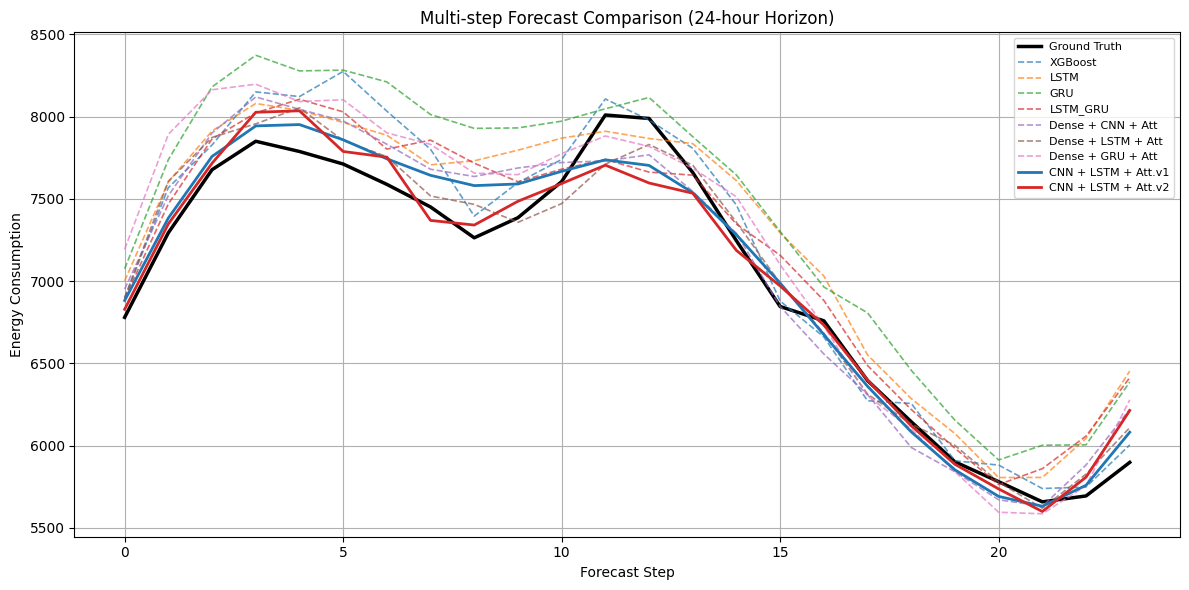

Best-fit Sample Index: 568, Combined MSE: 48858.33


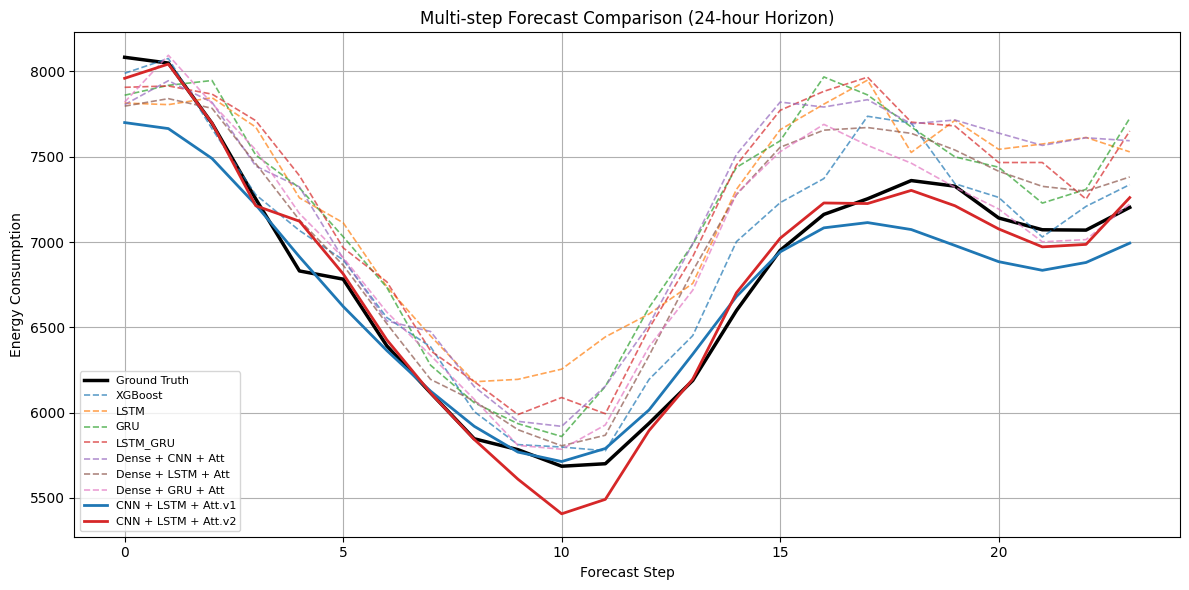

Best-fit Sample Index: 1734, Combined MSE: 52548.53


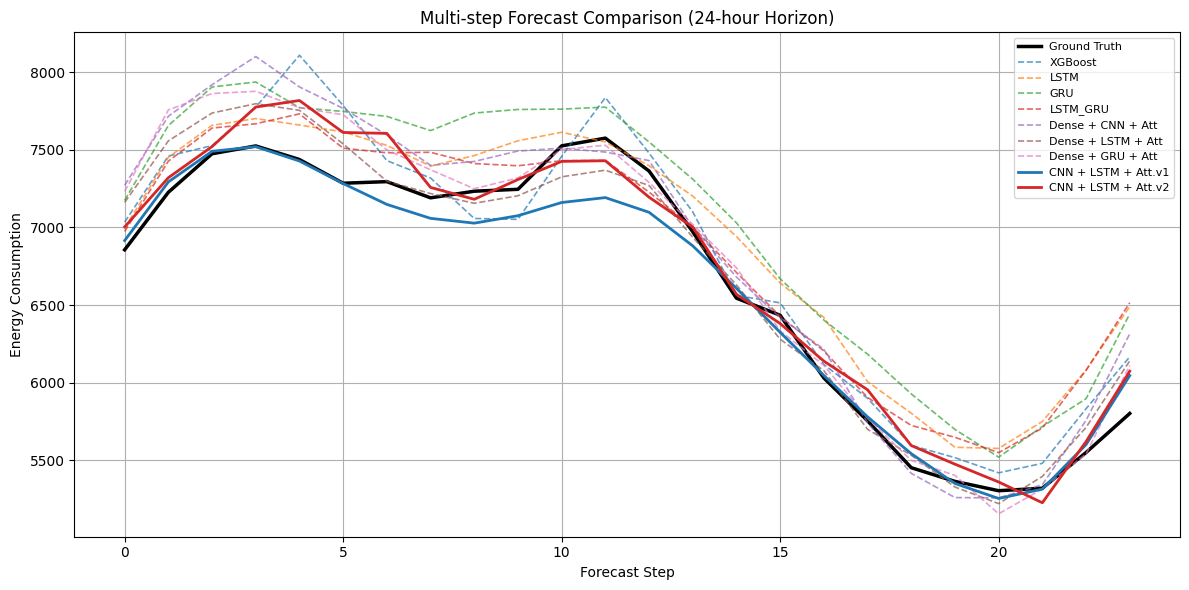

In [72]:
top_fit_samples = find_best_fit_samples(
    y_true=y_test_inv,
    pred_dict=all_preds,
    model_1="CNN + LSTM + Att.v1",
    model_2="CNN + LSTM + Att.v2",
    top_k=3
)

for idx, score in top_fit_samples:
    print(f"Best-fit Sample Index: {idx}, Combined MSE: {score:.2f}")
    compare_models_on_same_plot_2(y_test_inv, all_preds, start_index=idx)
